In [20]:
# imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
import datetime

from dataclasses import dataclass
from math import radians, cos, sin, asin, sqrt
# from ydata_profiling import ProfileReport

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# File path for csv File
filepath = "./../data/raw/datathon_2024_dataset.csv"
astro_df = pd.read_csv(filepath, index_col=0)
astro_df["game_date"] = [date[:4] + "-" + date[4:6] + "-" + date[6:] for date in astro_df["game_date"].astype(str)]
astro_df["game_date"] = pd.to_datetime(astro_df["game_date"])
astro_df["game_date"].dtypes

dtype('<M8[ns]')

In [16]:
homeOBP = []
awayOBP = []

teamLastGameDate = {}
homeConsecutiveRestDays = []
awayConsecutiveRestDays = []
def calculateOBP(prefix,row):
    H = row[prefix+"1b"] + row[prefix+"2b"] + row[prefix+"3b"] + row[prefix+"hr"]
    obp = None
    if H != 0:
        obp = ((H + row[prefix+"bb"] + row[prefix+"hbp"]) / (row[prefix+"pa"]))

    return obp

for index, row in astro_df.iterrows():
    # calulate OBP for both home and away
    home_OBP = calculateOBP("home_",row)
    away_OBP = calculateOBP("away_",row)

    homeOBP.append(home_OBP)
    awayOBP.append(away_OBP)

    # Calculate consectitive rest days for each team





        # Calculate for home team
    if not (row['home_team'] in teamLastGameDate):
        teamLastGameDate[row['home_team']] = None
    
    if teamLastGameDate[row['home_team']]  is None or row['game_date'] == teamLastGameDate[row['home_team']] + datetime.timedelta(days=1):
        homeConsecutiveRestDays.append(0)
    else:
        homeConsecutiveRestDays.append(row['game_date'].day - teamLastGameDate[row['home_team']].day)
    
    teamLastGameDate[row['home_team']]  = row['game_date']

        # Calculate for away team

    if not (row['away_team'] in teamConsecutiveRestDays):
        teamLastGameDate[row['away_team']] = None

    if teamLastGameDate[row['away_team']] is None or row['game_date'] == teamLastGameDate[row['away_team']] + datetime.timedelta(days=1):
        awayConsecutiveRestDays.append(0)
    else:
        awayConsecutiveRestDays.append(row['game_date'].day - teamLastGameDate[row['away_team']].day)
    
    teamLastGameDate[row['away_team']]  = row['game_date']

astro_df['home_obp'] = homeOBP
astro_df['away_obp'] = awayOBP
astro_df['home_restdays'] = homeConsecutiveRestDays
astro_df['away_restdays'] = awayConsecutiveRestDays

NameError: name 'hou_df' is not defined

c:\Users\cc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='is_day_game', ylabel='home_score'>

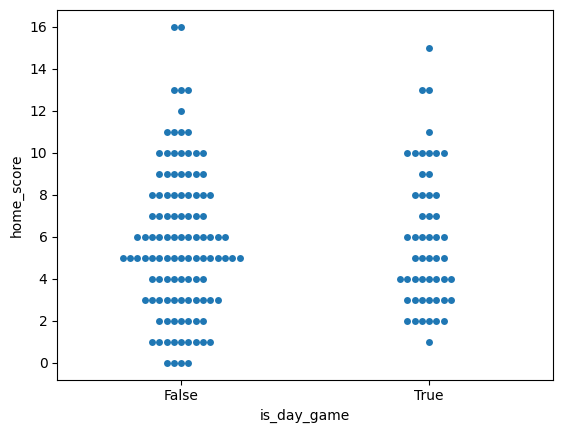

In [7]:
sns.swarmplot(data=hou_df[hou_df["game_date"].dt.year < 2001], x="is_day_game", y="home_score")

c:\Users\cc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='game_date', ylabel='obp'>

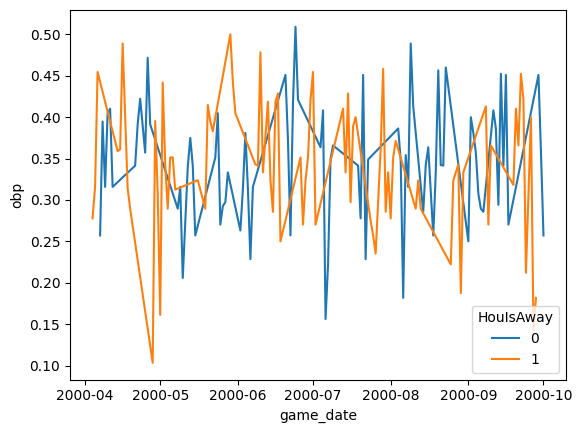

In [8]:
sns.lineplot(data=hou_df[hou_df["game_date"].dt.year < 2001], x="game_date", y="obp", hue="HouIsAway")

In [9]:
hou_df.dropna(subset=["obp"], inplace=True)

C:\Users\cc\AppData\Local\Temp\ipykernel_4216\1835416206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df.dropna(subset=["obp"], inplace=True)


<Axes: xlabel='obp', ylabel='Density'>

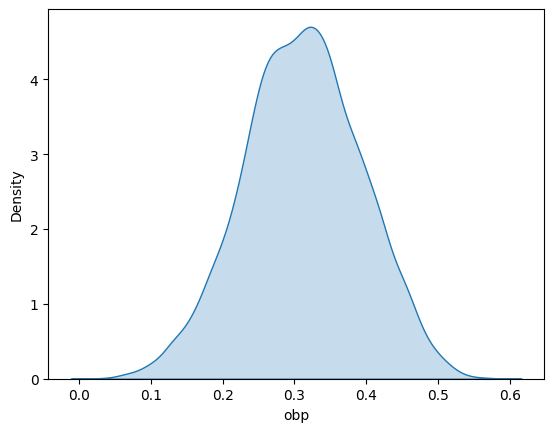

In [10]:
sns.kdeplot(x=hou_df["obp"], fill=True)

In [11]:
# The KDE plot shows that the distribution of OBP is somewhat normal, so we can use a t-test to compare the means of the two groups
# The null hypothesis is that the means of the two groups are equal

hou_df.groupby(by="HouIsAway")["obp"].mean()
ttest_ind(hou_df[hou_df["HouIsAway"] == 1]["obp"], hou_df[hou_df["HouIsAway"] == 0]["obp"])

# The p-value is less than 0.05, so we can reject the null hypothesis and conclude that the means of the two groups are not equal

TtestResult(statistic=7.343573810622198, pvalue=2.534155570417674e-13, df=3778.0)

In [12]:
hou_df[hou_df["HouIsAway"] == 1]["obp"].mean()
hou_df[hou_df["HouIsAway"] == 0]["obp"].mean()

0.3016858507571775

c:\Users\cc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='consecutiveGames', ylabel='obp'>

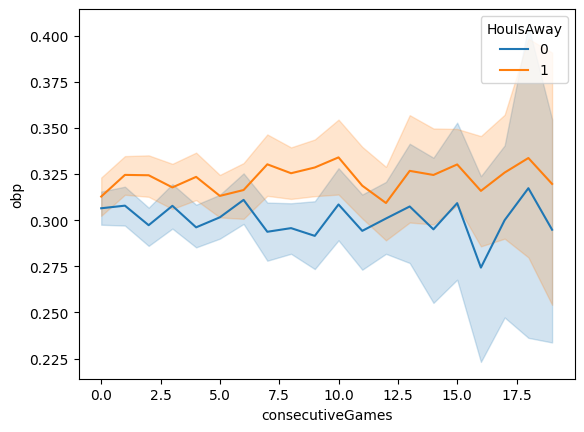

In [13]:
sns.lineplot(x="consecutiveGames", hue="HouIsAway", y="obp", data=hou_df)

In [14]:
# Brandon: I'll add the columns for distance traveled from last game and consecutive off days

In [23]:
# Brandon: Adds a coulmn called consecutiveRestDasys which lists the number of days inbetween days played
# Brandon: Copy and pasted code from consectiveGameDays and made some changes

consecutiveRestDays = []
lastGameDate = None
for index, row in hou_df.iterrows():
    if lastGameDate == None or row['game_date'] == lastGameDate + datetime.timedelta(days=1):
        consecutiveRestDays.append(0)
    else:
        consecutiveRestDays.append(row['game_date'].day - lastGameDate.day)

    lastGameDate = row['game_date']
    
hou_df['consecutiveRestDays'] = consecutiveRestDays
hou_df

C:\Users\cc\AppData\Local\Temp\ipykernel_4216\1958453986.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['consecutiveRestDays'] = consecutiveRestDays


,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,obp,consecutiveGames,HouIsAway,consecutiveRestDasys,consecutiveRestDays
19,2000-04-04,PIT,HOU,False,2,5,PIT07,Three Rivers Stadium,Pittsburgh,PA,37,3,1,0,1,20,6,6,0,36,5,0,0,1,21,5,3,1,0.277778,0,1,0,0
32,2000-04-05,PIT,HOU,False,2,11,PIT07,Three Rivers Stadium,Pittsburgh,PA,43,6,2,1,1,14,12,7,0,38,7,2,0,0,24,2,3,0,0.315789,1,1,0,0
46,2000-04-06,PIT,HOU,True,10,1,PIT07,Three Rivers Stadium,Pittsburgh,PA,31,0,2,0,0,18,8,3,0,44,9,4,1,2,15,9,4,0,0.454545,2,1,0,0
57,2000-04-07,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,TX,35,3,1,0,2,21,5,3,0,32,4,0,0,1,20,5,2,0,0.257143,3,0,0,0
72,2000-04-08,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,TX,38,7,3,0,1,19,4,3,1,38,6,1,2,2,19,5,3,0,0.394737,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56701,2023-09-26,SEA,HOU,False,6,2,SEA03,Safeco Field,Seattle,WA,39,9,1,0,0,20,6,1,2,36,7,0,0,1,13,11,4,0,0.333333,4,1,0,0
56717,2023-09-27,SEA,HOU,False,3,8,SEA03,Safeco Field,Seattle,WA,44,8,3,0,3,20,6,4,0,43,6,1,0,1,10,16,9,0,0.395349,5,1,0,0
56730,2023-09-29,ARI,HOU,False,1,2,PHO01,Chase Field,Phoenix,AZ,34,6,2,0,0,15,10,1,0,35,2,2,0,0,23,4,4,0,0.228571,0,1,2,2
56744,2023-09-30,ARI,HOU,False,0,1,PHO01,Chase Field,Phoenix,AZ,33,4,2,0,0,17,8,2,0,37,5,0,0,0,17,8,6,1,0.324324,1,1,0,0


In [33]:
# Brandon: Adds a column for distance travelled between matches
@dataclass
class Location:
    longitude: float
    latitude: float

locations = {
    "Dyersville": Location(latitude= 42.4836, longitude= 91.1141),
    "Washington": Location(longitude=-122.32718290060447, latitude=47.59111075),
    "Philadelphia": Location(longitude=-75.16483547778323, latitude=39.996116349999994),
    "Baltimore": Location(longitude=-76.61870875574147, latitude=39.2886044),
    "Los Angeles": Location(longitude=-118.28802864848308, latitude=34.0139923),
    "Lake Buena Vista": Location(longitude=-81.5753182375872, latitude=28.34372875),
    "Denver": Location(longitude=-105.0214597, latitude=39.7400878),
    "Boston": Location(longitude=-78.77370516802709, latitude=42.6904416),
    "Detroit": Location(longitude=-95.8533333, latitude=46.8069444),
    "Cleveland": Location(longitude=-81.69971184525946, latitude=41.5060559),
    "Houston": Location(longitude=-83.69428985932677, latitude=32.5531761),
    "New York": Location(longitude=-1.3626780163091192, latitude=53.4267854),
    "Cincinnati": Location(longitude=-84.51371634509104, latitude=39.1301459),
    "Kansas City": Location(longitude=-94.54036478875975, latitude=39.291054),
    "Chicago": Location(longitude=-87.6742028, latitude=41.8814716),
    "San Juan": Location(longitude=-117.62378254131188, latitude=33.503761749999995),
    "London": Location(longitude=-0.016623759002470637, latitude=51.53862065),
    "Pittsburgh": Location(longitude=-80.01575493349428, latitude=40.44671645),
    "Sydney": Location(longitude=151.00000746396432, latitude=-33.8087178),
    "San Francisco": Location(longitude=-122.45600968359278, latitude=37.766867),
    "Anaheim": Location(longitude=-117.88174262759796, latitude=33.8002599),
    "Omaha": Location(longitude=-95.94227635668676, latitude=41.21148395),
    "Miami": Location(longitude=-80.18794351626137, latitude=25.781359549999998),
    "Tokyo": Location(longitude=139.52707517816015, latitude=35.66418645),
    "Williamsport": Location(longitude=-77.07740738423433, latitude=41.24249025),
    "Oakland": Location(longitude=-122.20293232639798, latitude=37.75027335),
    "Seattle": Location(longitude=-122.32718290060447, latitude=47.59111075),
    "St. Petersburg": Location(longitude=30.221060751610707, latitude=59.9723766),
    "Fort Bragg": Location(longitude=-123.78576850038291, latitude=39.4373693),
    "Dunedin": Location(longitude=-82.7866619541428, latitude=28.0038021),
    "Atlanta": Location(longitude=-94.1437551238482, latitude=33.122242400000005),
    "Buffalo": Location(longitude=-101.6048748081557, latitude=33.87278885),
    "Montreal": Location(longitude=-73.55164580516643, latitude=45.55779835),
    "Toronto": Location(longitude=-79.3995096343725, latitude=43.630656349999995),
    "Arlington": Location(longitude=0.227449139219988, latitude=50.8578528),
    "Minneapolis": Location(longitude=-93.2231906824895, latitude=44.97653965),
    "Monterrey": Location(longitude=-100.31599383508116, latitude=25.7006158),
    "Phoenix": Location(longitude=-111.95422089528068, latitude=33.4492717),
    "San Diego": Location(longitude=-117.120158, latitude=32.7809702),
    "Milwaukee": Location(longitude=-87.91695198984257, latitude=43.0422882),
    "St. Louis": Location(longitude=-90.1945093, latitude=38.6235105)
}

# haversine function
def distance(from_location: Location, to_location: Location) -> float:
    
    radius_of_earth = 6371.0

    change_in_longitude = radians(to_location.longitude - from_location.longitude)
    change_in_latitude = radians(to_location.latitude - from_location.latitude)

    angle = sin(change_in_latitude / 2) ** 2 + cos(radians(from_location.latitude)) * cos(radians(to_location.latitude)) * sin(change_in_longitude / 2) ** 2
    curvature = 2 * asin(sqrt(angle))
    return radius_of_earth * curvature

distancesTravelled = []
lastLocation = None

for index, row in hou_df.iterrows():
    if lastLocation is None or row['city'] is lastLocation:
        distancesTravelled.append(0)
    else:
        travelledDistance = distance(locations[lastLocation], locations[row['city']])
        distancesTravelled.append(travelledDistance)

    lastLocation = row['city']

hou_df['distancesTravelled'] = distancesTravelled
hou_df


C:\Users\cc\AppData\Local\Temp\ipykernel_4216\3463783876.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hou_df['distancesTravelled'] = distancesTravelled


,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,state,home_pa,home_1b,home_2b,home_3b,home_hr,home_fo,home_so,home_bb,home_hbp,away_pa,away_1b,away_2b,away_3b,away_hr,away_fo,away_so,away_bb,away_hbp,obp,consecutiveGames,HouIsAway,consecutiveRestDasys,consecutiveRestDays,distancesTravelled
19,2000-04-04,PIT,HOU,False,2,5,PIT07,Three Rivers Stadium,Pittsburgh,PA,37,3,1,0,1,20,6,6,0,36,5,0,0,1,21,5,3,1,0.277778,0,1,0,0,0.000000
32,2000-04-05,PIT,HOU,False,2,11,PIT07,Three Rivers Stadium,Pittsburgh,PA,43,6,2,1,1,14,12,7,0,38,7,2,0,0,24,2,3,0,0.315789,1,1,0,0,0.000000
46,2000-04-06,PIT,HOU,True,10,1,PIT07,Three Rivers Stadium,Pittsburgh,PA,31,0,2,0,0,18,8,3,0,44,9,4,1,2,15,9,4,0,0.454545,2,1,0,0,0.000000
57,2000-04-07,HOU,PHI,False,1,4,HOU03,Minute Maid Park,Houston,TX,35,3,1,0,2,21,5,3,0,32,4,0,0,1,20,5,2,0,0.257143,3,0,0,0,937.039324
72,2000-04-08,HOU,PHI,True,8,5,HOU03,Minute Maid Park,Houston,TX,38,7,3,0,1,19,4,3,1,38,6,1,2,2,19,5,3,0,0.394737,4,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56701,2023-09-26,SEA,HOU,False,6,2,SEA03,Safeco Field,Seattle,WA,39,9,1,0,0,20,6,1,2,36,7,0,0,1,13,11,4,0,0.333333,4,1,0,0,0.000000
56717,2023-09-27,SEA,HOU,False,3,8,SEA03,Safeco Field,Seattle,WA,44,8,3,0,3,20,6,4,0,43,6,1,0,1,10,16,9,0,0.395349,5,1,0,0,0.000000
56730,2023-09-29,ARI,HOU,False,1,2,PHO01,Chase Field,Phoenix,AZ,34,6,2,0,0,15,10,1,0,35,2,2,0,0,23,4,4,0,0.228571,0,1,2,2,1796.705934
56744,2023-09-30,ARI,HOU,False,0,1,PHO01,Chase Field,Phoenix,AZ,33,4,2,0,0,17,8,2,0,37,5,0,0,0,17,8,6,1,0.324324,1,1,0,0,0.000000
